# Word Vector Analysis with Scikit-Learn
This Jupyter notebook demonstrates how to use Scikit-Learn to analyze word vectors. Word vectors, also known as word embeddings, are a type of representation for text data where words with similar meanings have similar vectors. 

We will be using Scikit-Learn to compute some common metrics on these vectors, such as cosine similarity and euclidean distance.

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from gensim.models import Word2Vec

# Load Word2Vec Model
Assuming we have a trained Word2Vec model saved as 'word2vec.model', we can load it like this:

In [2]:
# Load Word2Vec model
model = Word2Vec.load("word2vec.model")

# Word Vector Analysis
Now that we have our word vectors, we can perform some analysis on them.

In [3]:
# Get vectors for 'king' and 'queen'
king_vector = model.wv['king']
queen_vector = model.wv['queen']

# Compute cosine similarity between 'king' and 'queen'
cosine_sim = cosine_similarity(king_vector.reshape(1, -1), queen_vector.reshape(1, -1))
print(f"Cosine similarity between 'king' and 'queen': {cosine_sim[0][0]}")

# Compute euclidean distance between 'king' and 'queen'
euclidean_dist = euclidean_distances(king_vector.reshape(1, -1), queen_vector.reshape(1, -1))
print(f"Euclidean distance between 'king' and 'queen': {euclidean_dist[0][0]}")

Cosine similarity between 'king' and 'queen': 0.492997944355011
Euclidean distance between 'king' and 'queen': 8.770065307617188


# Similar Words
We can also use the Word2Vec model to find words that are most similar to a given word.

In [4]:
# Find the top 5 words similar to 'king'
similar_words = model.wv.most_similar('king', topn=5)
print("Words similar to 'king':", similar_words)

Words similar to 'king': [('rodney', 0.8114326000213623), ('messiah', 0.6334888339042664), ('kbanaianbernardpitzerclaremontedu', 0.6288059949874878), ('prophesy', 0.6220226287841797), ('martyr', 0.6148427128791809)]


# Additional Word Vector Analysis
In this part of the notebook, we'll analyze more word pairs to demonstrate how the difference between their vectors often represent semantic relationships. We'll also visualize these word pairs in a 3D space.

In [8]:
# Additional word pairs
word_pairs = [('king', 'queen'), ('man', 'woman')]

# Compute vector differences for each pair
vector_differences = []
for pair in word_pairs:
    vector_differences.append(model.wv[pair[0]] - model.wv[pair[1]])

# Print vector differences
for pair, diff in zip(word_pairs, vector_differences):
    print(f"Vector difference between '{pair[0]}' and '{pair[1]}': {diff}")

Vector difference between 'king' and 'queen': [-1.2223129  -0.34149972 -1.2799749   0.13096079 -0.6504425  -0.03465259
 -1.2352263  -1.7026275  -0.7885357   0.61673963  1.2207744   0.6788022
  0.15303394 -0.714027   -2.0969367  -1.0573053   1.8190359  -0.34534162
 -0.35063598 -1.3476676  -0.5778835  -0.52291167  2.1916678   0.05689928
 -1.5508631  -0.8662588   0.8077574   0.89607036  0.8362595   0.48909765
  1.0350002  -0.8089381  -0.9574376  -0.08222979  0.4809731  -0.4199961
 -1.1140661  -1.2282829   0.26075542 -1.1330585  -0.2897301  -0.7825438
  0.17420575 -1.0545936  -1.0641212  -1.4614222  -0.03109051 -1.2406334
  0.52106154  0.3330129  -0.7013368  -0.6876441   0.4861112   0.7329445
  0.2923145   0.12948386 -0.32309985 -2.5420384  -0.06535554 -0.0104106
 -0.38134265 -0.33440158  0.7226188  -0.844632   -0.5164484  -0.7781069
  0.8507149   0.1839019  -1.7731743  -0.5126066  -1.0283194   0.1396608
 -1.0598817   0.99679655 -0.8789747  -0.59351414 -0.26190498 -0.10061596
 -0.27674177 

# 3D Visualization
Now we'll visualize these word pairs in a 3D space using Matplotlib.

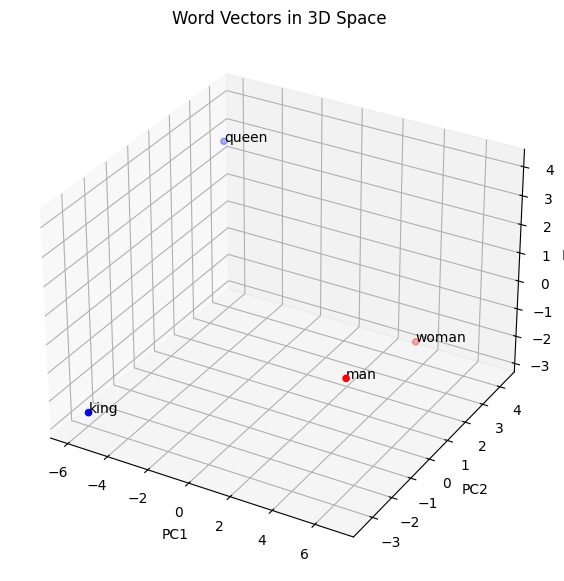

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Prepare word vectors for PCA
word_vectors = []
for pair in word_pairs:
    word_vectors.append(model.wv[pair[0]])
    word_vectors.append(model.wv[pair[1]])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
result = pca.fit_transform(word_vectors)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Add each word pair to the plot
colors = ['b', 'r', 'g']
for i in range(0, len(result), 2):
    ax.scatter(result[i:i+2, 0], result[i:i+2, 1], result[i:i+2, 2], color=colors[i//2])
    ax.text(result[i, 0], result[i, 1], result[i, 2], word_pairs[i//2][0])
    ax.text(result[i+1, 0], result[i+1, 1], result[i+1, 2], word_pairs[i//2][1])

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Word Vectors in 3D Space')

# Show the plot
plt.show()